훈련 샘플에 수백만개의 특성이 담겨져 있다면?
1. 수백만 차원이 된다
2. 훈련을 느리게 한다
3. 좋은 솔루션을 찾기 어렵게 만든다

이를 **차원의 저주**라고 한다.

해결책은? \
 -> 특성 수를 줄인다

But, 
차원 축소 -> 일부 정보 유실
훈련 속도 증가 , 시스템 성능 저하 가능 
그래서 무조건 차원 축소하는 것보다 원본 데이터로도 훈련해봐야 한다.

차원을 축소하면? \
고차원의 훈련 세트를 저차원으로 시각화하여 요점만 표현할 수 있다

# 1. 차원의 저주
예) 2차원에서 임의의 두 점의 거리가 약 0.52일 때, 1,000,000차원에서 두 거리는 408.25가 된다, \
대부분의 훈련 데이터가 서로 멀리 떨어진다. 그러면 새로운 샘플이 추가되어도 모두 멀리떨어져 있을 확률이 크다. \
이는 다양한 변수를 모두 고려해야하므로 차원이 커지면 과대적합의 위험이 커진다는 뜻이다.

해결책: train dataset 밀도가 충분히 높아질 때까지 train dataset 크기를 키운다. 하지만 이 또한 우주에 있는 원자 수 모두를 합친 것보다 더 많은 data를 모아야 한다.

# 2. 차원 축소 방법
## 2-1. 투영 projection
대부분 train dataset이 고차원 전체에 고루 분포되어있진 않다. 보통 고차원 속 일부인 저차원에 분포되어있다. \
특정 평면공간 2D 인 저차원에 데이터셋을 수직으로 투영하면 우리는 차원을 축소한 2D dataset을 얻게된다.

스위스 롤 데이터셋의 경우 투영방법을 사용하면 데이터가 뒤틀려서 나오게 됩니다. 이런 경우 매니폴드 학습 방법을 이용합니다.
## 2-2. 매니폴드 학습
2D 매니폴드란 고차원에서 뒤틀린 2D 모양이다. \
d차원 매니폴드 : d차원 초평면으로 보일 수 있는 (차원축소할 수 있는) n차원 공간의 일부 

매니폴드 학습 : 차원 축소 알고리즘이 훈련 샘플이 놓여있는 매니폴드를 모델링한다 \
매니폴드 가정/가설 : 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 구조되어있다  \

# 3. PCA
주성분 분석 PCA (Pricipal component analysis) \
    데이터에 가장 가까운 초평면 정의 -> 데이터를 평면에 투영

# 3-1. 분산 보존
초평면 정의하기 \
분산을 최대한 보전하는 초평면을 골라야한다. 정보가 가장 적게 손실되므로. 
이는 원본 데이터셋과 투영된 데이터셋 사이 평균 제곱 거리 값이 최소인 축이다.

# 3-2. 주성분
1. 분산이 최대인 축 - 실선
2. 첫번째 축에 직교하는 , 남은 분산을 최대한 보전하는 축 - 점선
3. 첫 번째와 두 번째의 직교가 되는 선 
4. 데이터셋의 차원의 수만큼 축을 찾는다
i번째 축을 i번째 주성분PC라고 부른다.

주성분 찾기 : 특잇값 분해 SVD \
표준 행렬 분해 기술 SVD를 이용하여 trainset matrix X를 *세 개 행렬*의 행렬 곱셈으로 분해할 수 있다. \
주성분의 단위 벡터는 V에 담긴다.

Python - Numpy - svd() 함수로 모든 주성분을 구한 뒤 두 개의 PC 단위 벡터를 리턴해준다.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

PCA의 데이터셋 평균=0 \
    코드로 구현시 데이터 평균을 0으로 만들어야한다. \
scikit-learn 에서는 평균을 0으로 처리해준다. 


In [2]:
print(c1,c2)

[0.93636116 0.29854881 0.18465208] [-0.34027485  0.90119108  0.2684542 ]


## 3-3. d차원으로 투영하기 projection

주성분 추출 완료시 d개 주성분으로 정의한 초평면에 투영하여 데이터셋 차원 축소 가능

train dataset을 d차원으로 투영하기 = 행렬X * V의 첫d열로 구성된 행렬

In [3]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [8]:
print(X_centered.shape,X2D.shape)

(60, 3) (60, 2)


## 3-4. Scikit-learn 이용한 SVD 분해
데이터셋을 2차원으로 줄여보자

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [10]:
print(X.shape, X2D.shape)

(60, 3) (60, 2)


아래는 V의 첫 d열로만 구성된 행렬이다. \
첫 번째 주성분을 정의하는 단위 벡터이다.

In [12]:
pca.components_.T[:,0] 

array([-0.93636116, -0.29854881, -0.18465208])

## 3-5. 설명된 분산의 비율
pca.explained_variance_ratio_ 를 통해 각 주성분의 분산 비율을 알 수 있다.
분산이 가장 큰 순서대로 찾는다.

In [13]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

## 3-6. 적절한 차원 수 선택하기?
고차원을 임의의 저차원으로 축소하는 것보다 가장 데이터셋을 잘 표현할 수 있고 다루기 좋은 차원으로 줄이는 것이 좋다. \
조건으로 충분한 분산 95%가 될 때까지 축을 구하는게 간단하다. 

In [14]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [20]:
d

154

상단에서 d를 구하긴했지만, n_components 값으로는 보존하려는 분산 비율을 0 ~ 1 사이 값으로 넣어주는게 좋다.

In [17]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

혹은 그림을 그려서 볼 수도 있다. cumsum 그래프를 그린다. 
일명 elbow graph

Saving figure explained_variance_plot


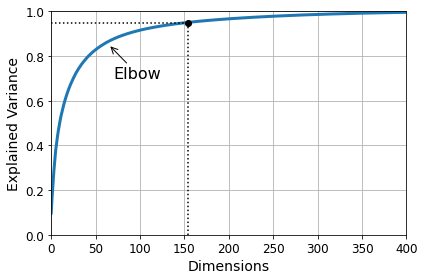

In [16]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

## 3-7. 압축을 위한 PCA
차원 축소 진행 -> 훈련 세트 크기 감소 -> (SVM...) 분류 알고리즘 사용시 속도 향상

압축된 데이터셋 원래 고차원으로 되돌리기
- PCA 투영의 변환을 반대로 적용한다

But, 
- 투영작업시 일정량 정보를 잃어버려서 완전한 원본 데이터셋으로 되돌리긴 힘들다
- 재구성 오차(원본 데이터와 복구 데이터셋 사이의 평균 제곱 거리)로 확인 가능하다

- pca.inverse_transform을 이용한 복원 예시

In [21]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [22]:
print(X_reduced.shape, X_recovered.shape)

(52500, 154) (52500, 784)


## 3-8. 랜덤 PCA
- scikit-learn의 랜덤 PCA
- svd_solver="randomized"
- 확률적 알고리즘을 활용한 주성분 근사값 찾기
- 계산 복잡도 O(mxd^2)+O(d^3)

- svd_solver="auto"
- m | n > 500 , d < m | n * 80% 이면 자동으로 랜덤 PCA 알고리즘을 사용하고 그 외에는 SVD 방식을 사용한다.

SVD 방식 계산 복잡도 : O(mxn^2) + O(n^3)

- svd_solver="full"
- SVD 방식으로 고정

In [23]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

## 3-9. 점진적 PCA
- PCA : 전체 훈련 셋을 SVD 알고리즘으로 실행한다.
- 점진적 PCA :
    1. 훈련 세트를 미니배치로 나눈다
    2. IPCA 알고리즘에 한 번에 하나씩 주입한다\
훈련 셋이 클 때 유용하다. 온라인으로 PCA 적용이 가능하다.
아래는 점진적 PCA 코드 예시이다.

In [24]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [25]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)
X_recovered_inc_pca

array([[-2.67584817e-13,  2.44948967e-12,  1.21049831e-12, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.97046026e-13,  7.69245050e-13,  3.99475595e-12, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.58926907e-14, -1.26431543e-12,  5.52785605e-12, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-9.98210387e-13,  1.10417326e-12, -2.91387948e-12, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.66896066e-13,  1.40453059e-12, -1.15320965e-12, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.35182329e-13, -1.99010328e-12,  1.96735919e-12, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

혹은 IncrementalPCA 에서는 특정 순간에 배열의 일부만 사용하는 특성을 이용하여, \
memap 클래스를 이용해 매우 큰 배열을 메모리에 들어 있는 것처럼 다룬다. 

In [26]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

del X_mm

X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, n_components=154)

# 4. 커널 PCA
복잡한 비선형 투형 수행하는 방법.\
투영 후 샘플의 군집 유지 혹은 꼬인 매니폴드에 가까운 데이터셋을 펼칠 때 유용하다.

아래는 kPCA 적용코드이다.


In [27]:

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

NameError: name 'make_swiss_roll' is not defined

## 4-1. 커널 선택과 하이퍼파라미터 튜닝
kPCA란
- 비지도 학습
- 명확한 성능 측정 기준이 없다
- 전처리 단계로 차원축소로 진행 -> 그리드 탐색을 이용하여 성능이 좋은 커널, 하이퍼파라미터 값 탐색 가능

선형 PCA를 역전시키면 
- 선형 PCA를 역전 - 데이터 포인트가 원본 공간이 아닌 특성 공간에 놓임 - 재구성된 포인트 계산 불가 - 재구성에 따른 실제 에러 계산 불가 
- 재구성된 포인트에 가깝게 매핑된 원본 공간 포인트 찾기 가능 = 재구성 원상
- 원본 샘플과 재구성 원상의 제곱 거리를 측정 가능 - 이를 최소화하는 커널과 하이퍼파라미터값 선택 가능

재구성 방법
- 투영된 샘플:train dataset , 원본 샘플:target y로 설정한 지도학습-회귀모델 훈련하는 방법이 있다

In [28]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

NameError: name 'KernelPCA' is not defined

# 5. LLE

지역 선형 임베딩 
- 비선형 차원 축소
- 투영에 의존하지 않는 매니폴드 학습

방법
1. 각 훈련 샘플이 가장 가까운 이웃에 얼마나 선형적으로 연관되어 있는가 측정
2. 국부적인 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾는다



# 6. 다른 차원 축소 기법

**랜덤 투영**

**다차원 스케일링**

**Isomap**

**t-SNE**

**선형 판별 분석**